# Factors that mosts Inflences a Cutomers "LoanStatus" As Completed
## by Chukwudi Ibe

## Investigation Overview

> In this investigation, I wanted to look at the the factors that can help predict the  best loan to invest, The main focus was on the 
- LendersYield
- monthlypaymentamount
- loan original amount
- ProsperRating alpha

## Dataset Overview

> The data set contains 113,937 loans data entry, with 81 columns 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# loading the clean data set into pandas
df = pd.read_csv('prosper_loan_data_clean.csv')
df.head()

,ListingNumber,ListingCategory (numeric),BorrowerAPR,LenderYield,ProsperScore,StatedMonthlyIncome,EmploymentStatus,Term,LoanStatus,ProsperRating (Alpha),LoanOriginalAmount,TotalProsperLoans,DebtToIncomeRatio,MonthlyLoanPayment,ProsperScore_med
0,1209647,2,0.12016,0.0820,7.0,6125.000000,Employed,36,Current,A,10000,0.0,0.18,318.93,7.0
1,658116,16,0.12528,0.0874,9.0,2875.000000,Employed,36,Current,A,10000,0.0,0.15,321.45,9.0
2,909464,2,0.24614,0.1985,4.0,9583.333333,Employed,36,Current,D,15000,1.0,0.26,563.97,4.0
3,1074836,1,0.15425,0.1214,10.0,8333.333333,Employed,60,Current,B,15000,0.0,0.36,342.37,10.0
4,750899,1,0.31032,0.2612,2.0,2083.333333,Employed,36,Current,E,3000,0.0,0.27,122.67,2.0


In [3]:
# Creating a copy of the dataset
df_comp =df.copy()

In [4]:
#Creating a new column and called loanstatusB where there will be just 5 categories
list_stat = ['Current','Completed','Chargedoff','Defaulted']
def replace_stat(x):
    if x in list_stat:
        return x 
    elif x == 'FinalPaymentInProgress':
        return 'In Progress' # Home Improvement
    else:
        return 'Past Due' # Home Improvement
   
#applying custom function ato the LoanStatus column 
df_comp['LoanStatus_B'] = df_comp['LoanStatus'].apply(replace_stat)


In [5]:
# converting the "ProsperRating (Alpha)" to an orders categorical type
alpha = ['AA','A','B','C','D','E','HR']
pscore = pd.api.types.CategoricalDtype(ordered = True,categories = alpha)
df_comp['ProsperRating_Alpha'] = df_comp['ProsperRating (Alpha)'].astype(pscore)

### Bar Chart of Loan Status
#### we discover that out of the total entries up to 20,000 loans where completed,and over 50,000 are currently running

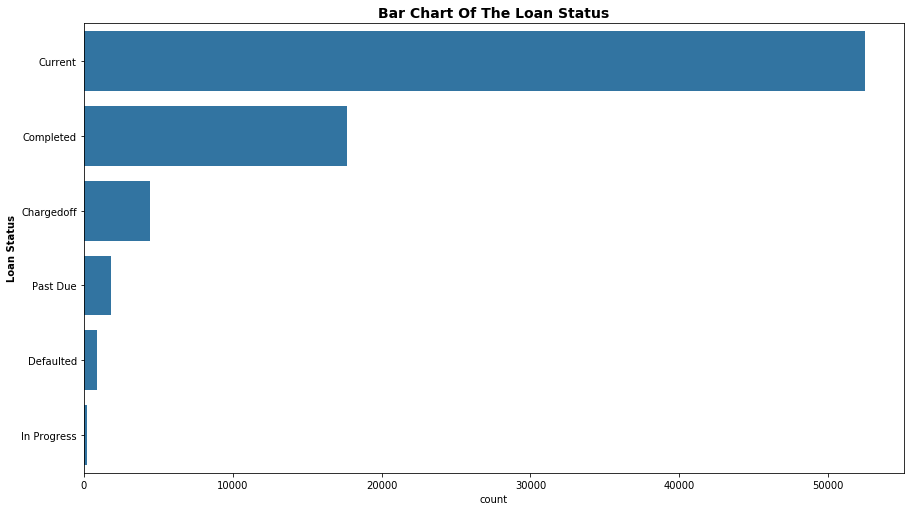

In [6]:
#visualising the loanstatus column
plt.figure(figsize=[14.70, 8.27])

base_color = sns.color_palette()[0]
loan_order =df_comp['LoanStatus_B'].value_counts().index
sns.countplot(data=df_comp,y='LoanStatus_B',color=base_color, order = loan_order);
plt.title('Bar chart of the Loan Status'.title(),fontsize = 14,weight = "bold");
plt.ylabel('Loan Status'.title(),fontsize = 10,weight = "bold");
#plt.ylabel('Monthly Loan Payment'.title(),fontsize = 10,weight = "bold")
#plt.title('Loan Amount Vs Monthly Loan Payment'.title(),fontsize = 14,weight = "bold");
#plt.xticks(rotation = 15);

### Lenders Yield
#### The distribution above is a normal distribution of point with a median value between 0.15 and 0.20

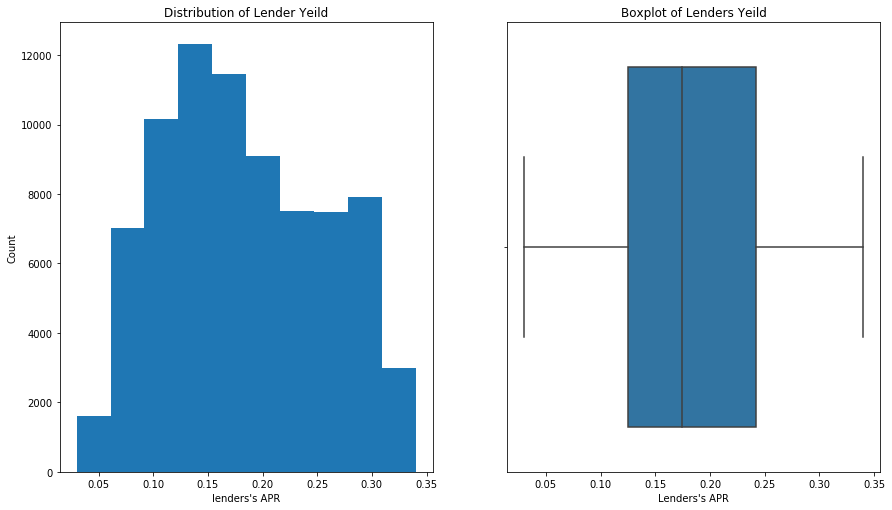

In [7]:
# distribution of Lendersyeild 
plt.figure(figsize=[14.70, 8.27])

plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
plt.hist(data = df_comp, x = 'LenderYield'); # histogram of lengths
plt.xlabel('lenders\'s APR')
plt.ylabel('Count')
plt.title('Distribution of Lender Yeild')
plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df_comp, x = 'LenderYield') # box plot of lengths
plt.xlabel('Lenders\'s APR');
plt.title('Boxplot of Lenders Yeild');


### Loan original Amount

the histogram is right skewwed with  a decrease in frequency as the loan amount increased,From the box plot of the we can see the center observed at approximately $7,000.

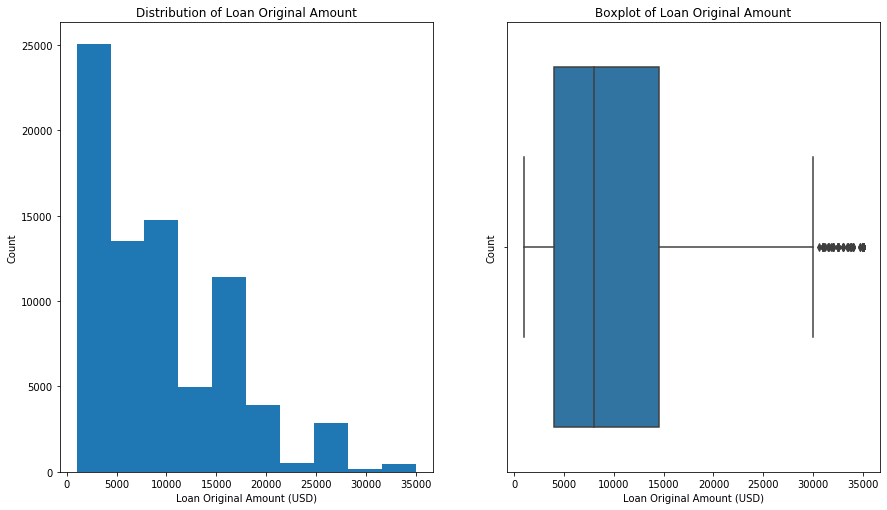

In [8]:
# investigting the Loan Original Amount variable
plt.figure(figsize=[14.70, 8.27])

# bins = np.arange(0, 50000+1000, 1000)

plt.subplot(1,2,1)
plt.hist(data = df_comp, x = 'LoanOriginalAmount')#, bins = bins)
plt.xlabel('Loan Original Amount (USD)')
plt.ylabel('Count')
plt.title('Distribution of Loan Original Amount')
plt.subplot(1,2,2) 
sns.boxplot(data = df_comp, x = 'LoanOriginalAmount') # box plot of lengths
plt.xlabel('Loan Original Amount (USD)');
plt.ylabel('Count');
plt.title('Boxplot of Loan Original Amount');


### Monthly Loan Payment
#####  The monthly loan payment is  right skewed 

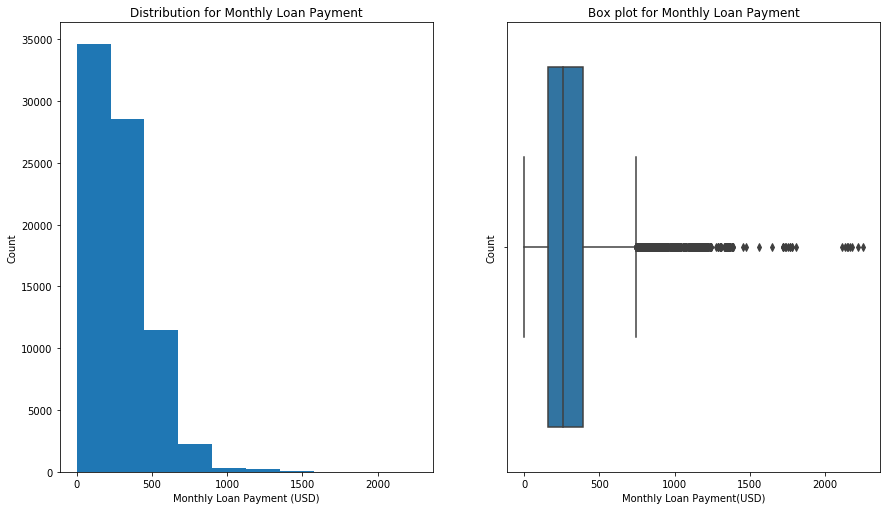

In [9]:
# investigting the Monthly Loan Payment variable
plt.figure(figsize=[14.70, 8.27])

# bins = np.arange(0, 50000+1000, 1000)

plt.subplot(1,2,1)
plt.hist(data = df_comp, x = 'MonthlyLoanPayment')#, bins = bins)
plt.xlabel('Monthly Loan Payment (USD)')
plt.ylabel('Count')
plt.title('Distribution for Monthly Loan Payment');
plt.subplot(1,2,2) 
sns.boxplot(data = df_comp, x = 'MonthlyLoanPayment') # box plot of lengths
plt.xlabel('Monthly Loan Payment(USD)');
plt.ylabel('Count');
plt.title('Box plot for Monthly Loan Payment');


#### Loan Original Amount vs MonthlyLoanPayment
when considering the loan original amount and the monthly loan payment we see  strong positive relationship between the two 
variables

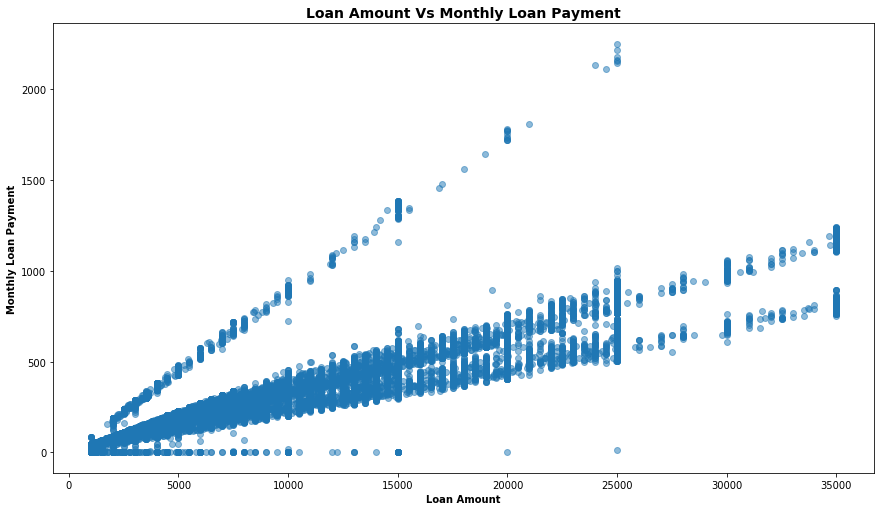

In [10]:
# scatter plot of LoanOriginalAmount vs. MonthlyLoanPayment, with log transform on price axis

plt.figure(figsize=[14.70, 8.27])
plt.scatter(data = df_comp, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', alpha = 0.5)
#plt.xlim([0, 3.5])
plt.xlabel('Loan Amount'.title(),fontsize = 10,weight = "bold")
#plt.yscale('log')
#plt.yticks([0,500, 1e3, 2e3, 5e3, 1e4, 2e4], [0,500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Monthly Loan Payment'.title(),fontsize = 10,weight = "bold")
plt.title('Loan Amount Vs Monthly Loan Payment'.title(),fontsize = 14,weight = "bold");
plt.show();

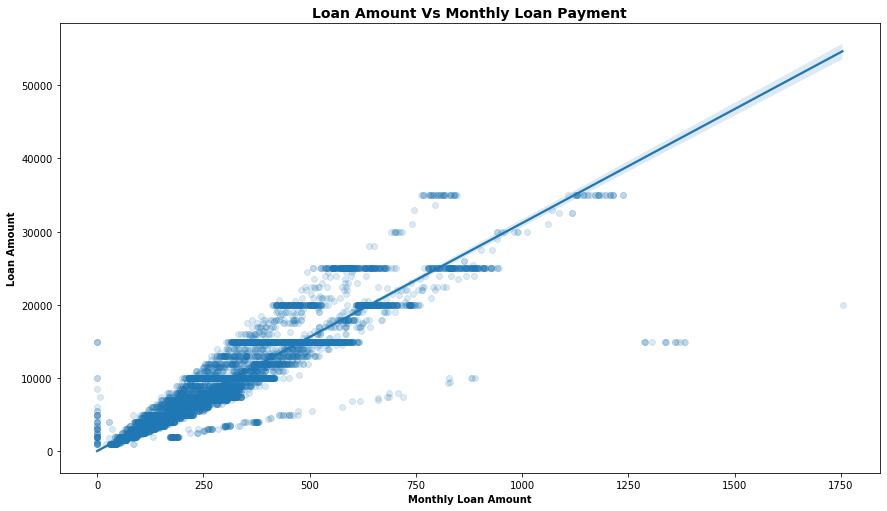

In [11]:
# Creating a sample
plt.figure(figsize=[14.70, 8.27])
df_samp = df_comp.sample(10000)

sns.regplot(data = df_samp, x = 'MonthlyLoanPayment',y = 'LoanOriginalAmount',x_jitter =0.5,
           scatter_kws ={'alpha':0.15});
plt.xlabel('Monthly loan Amount'.title(),fontsize = 10,weight = "bold")
plt.ylabel('Loan Amount'.title(),fontsize = 10,weight = "bold");
plt.title('Loan Amount Vs Monthly Loan Payment'.title(),fontsize = 14,weight = "bold");

#### ProperRating _Alpha vs lenderYield
here we see an incresing lenderYeild from low risk to  high risk, from our previous anlysis, the proper rating with the highest completed is "D" and it falls within the lenderyeild range of 0.17 and 0.30 

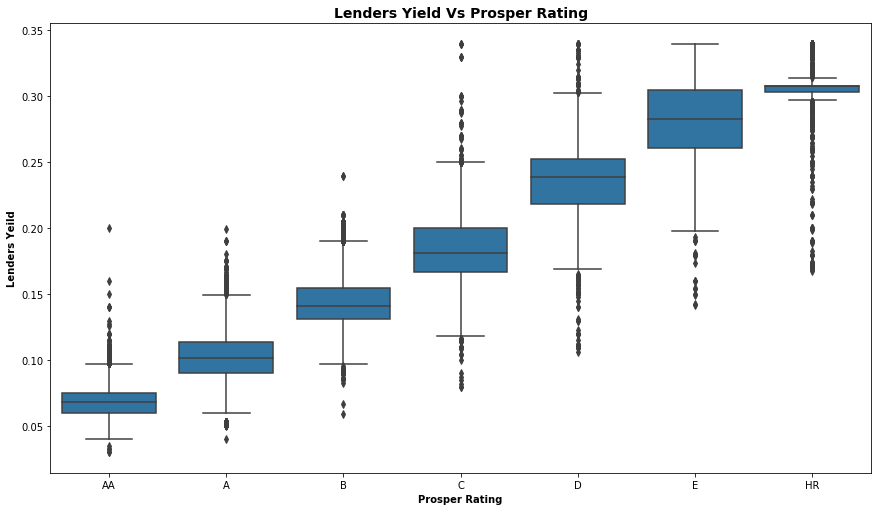

In [12]:
base_color = sns.color_palette()[0]
plt.figure(figsize=[14.70, 8.27])
sns.boxplot(data=df_comp,x = 'ProsperRating_Alpha',y = 'LenderYield',color =base_color);
#plt.xticks(rotation =15)
plt.xlabel('Prosper Rating'.title(),fontsize = 10,weight = "bold")
plt.ylabel('Lenders Yeild'.title(),fontsize = 10,weight = "bold");
plt.title('Lenders Yield Vs Prosper Rating'.title(),fontsize = 14,weight = "bold");

#### LoanOriginalAmount vs LoanStatus

we see that the range of loansOriginal amount for  completed loans falls in the range of 2500usd and 7500usd whis is less than 10,000usd

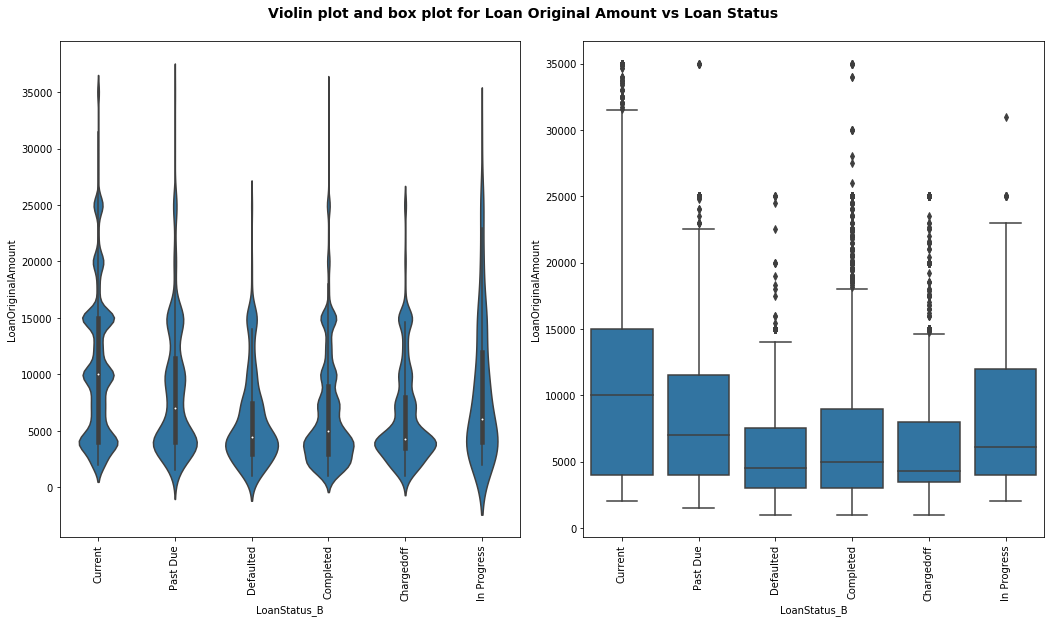

In [13]:
#plt.figure(figsize = [15,5])
plt.figure(figsize=[14.70, 8.27])
base_color = sns.color_palette()[0]

plt.suptitle("Violin plot and box plot for Loan Original Amount vs Loan Status ", y = 1.04,
            fontsize = 14,weight = "bold")

plt.subplot(1,2,1)
sns.violinplot(data=df_comp,y = 'LoanOriginalAmount',x = 'LoanStatus_B',color =base_color);
plt.xticks(rotation =90);

plt.subplot(1,2,2)
sns.boxplot(data=df_comp,y = 'LoanOriginalAmount',x = 'LoanStatus_B',color =base_color);

plt.xticks(rotation =90);
plt.tight_layout();

#### MonthlyLoanPayment vs LoanStatus

we can  see values of the monthly payment plan for completed loans to be between  200usd and 400usd though its thesam trens across a loan status

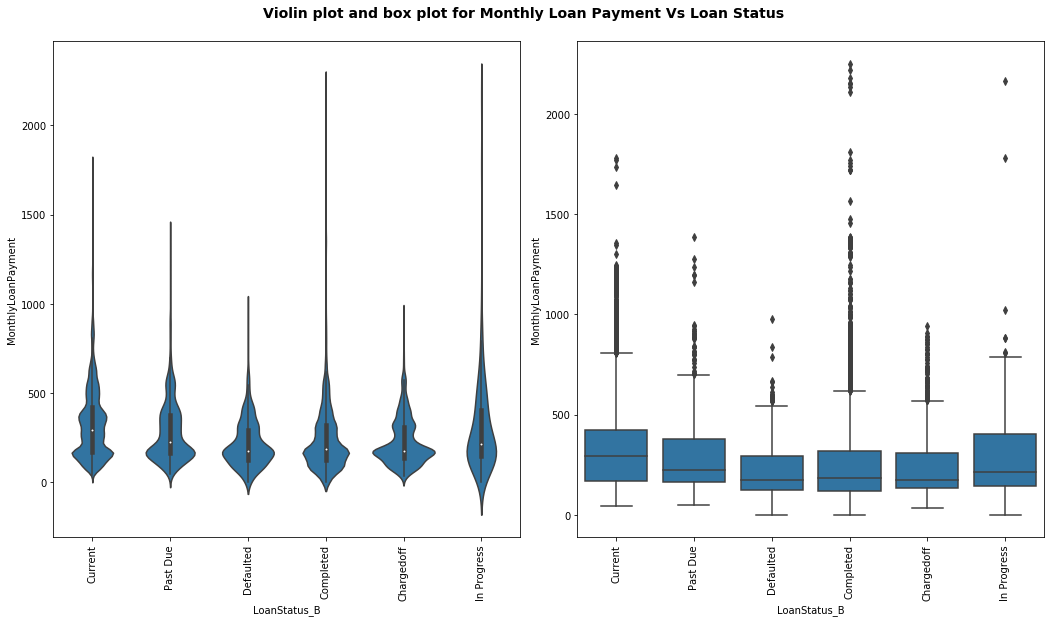

In [14]:
#plt.figure(figsize = (15, 5))
plt.figure(figsize=[14.70, 8.27])
base_color = sns.color_palette()[0]

plt.suptitle("Violin plot and box plot for Monthly Loan Payment Vs Loan Status ", y = 1.04,
            fontsize = 14,weight = "bold")

plt.subplot(1,2,1)
sns.violinplot(data=df_comp,y = 'MonthlyLoanPayment',x = 'LoanStatus_B',color =base_color);
plt.xticks(rotation =90)
           
plt.subplot(1,2,2)
sns.boxplot(data=df_comp,y = 'MonthlyLoanPayment',x = 'LoanStatus_B',color =base_color);

plt.xticks(rotation =90);
plt.tight_layout();

#### LoanStatus vs LenderYield
from our plot we see that the completed lons falls withing the LenderYield ranged of 0.13 and 0.30 

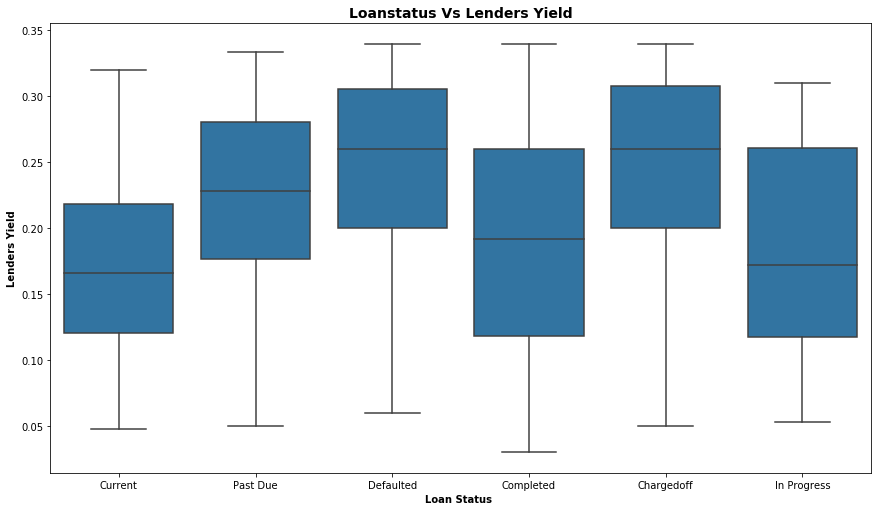

In [15]:
plt.figure(figsize=[14.70, 8.27])
base_color = sns.color_palette()[0]
sns.boxplot(data=df_comp,x = 'LoanStatus_B',y = 'LenderYield',color =base_color);
#plt.xticks(rotation =90);
plt.xlabel('Loan Status '.title(),fontsize = 10,weight = "bold")
plt.ylabel('Lenders Yield'.title(),fontsize = 10,weight = "bold");
plt.title('LoanStatus Vs Lenders Yield'.title(),fontsize = 14,weight = "bold");

#### Loan Status againt MonthlyLoanPayment,LoanOriginalAmount 
In the plot see That Majority of the completed loans falls under the 10,000 usd mark along the Loan Amount axis and below the 400usd mark along the Monthy loan Amount axis, so can conclude that 
to predict a loan that that will lead to a completed loan status the following must hold
- 1, Borrowers loan Amount must be < 10,000usd 
- 2, Borrowers Monthly Loan Amount  must be < 400usd per month

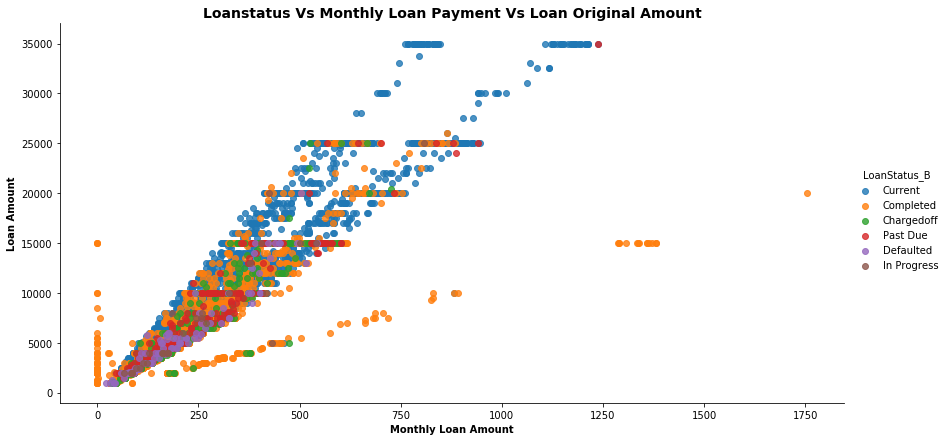

In [16]:
#df_sample = df_comp.sample(500)
#height = 8.27,  aspect = 14.70/8.27

g = sns.FacetGrid(data =df_samp,hue = 'LoanStatus_B',size =6, aspect =2)
g = g.map(sns.regplot,'MonthlyLoanPayment','LoanOriginalAmount',x_jitter= 0.04,fit_reg = False);
g.add_legend()
plt.xlabel('Monthly loan Amount'.title(),fontsize = 10,weight = "bold")
plt.ylabel('Loan Amount'.title(),fontsize = 10,weight = "bold");
plt.title('LoanStatus Vs Monthly Loan payment Vs Loan Original amount'.title(),fontsize = 14,weight = "bold");

####  Prosper rating by MonthlyLoanPayment,LoanOriginalAmount 
here we see a fourth patameter that can guide us to make the right choice, should parameter 1 and 2 hold we notice from the above visiualisation a saturation of loans with Prosper rating of C and D with loanAmount and MonthlyloanAmount
Range

- 4, Prosperating C or D is Prefered

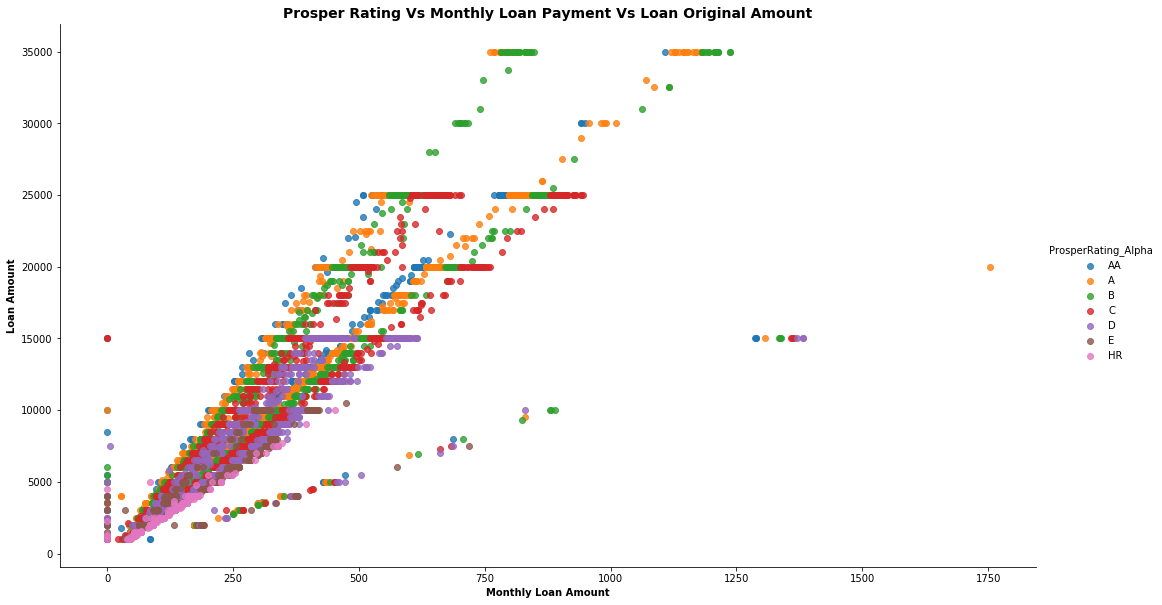

In [17]:
g = sns.FacetGrid(data =df_samp,hue = 'ProsperRating_Alpha',height = 8.27,  aspect = 14.70/8.27)
g = g.map(sns.regplot,'MonthlyLoanPayment','LoanOriginalAmount',x_jitter= 0.09,fit_reg = False);
g.add_legend()
plt.xlabel('Monthly loan Amount')
plt.ylabel('Loan Amount');
plt.xlabel('Monthly loan Amount'.title(),fontsize = 10,weight = "bold")
plt.ylabel('Loan Amount'.title(),fontsize = 10,weight = "bold");
plt.title('Prosper rating Vs Monthly Loan payment Vs Loan Original amount'.title(),fontsize = 14,weight = "bold");

### Term Vs Monthly Loan payment Vs Loan Original amount

This visualisation clealy shows us Loan Term should be 36 month  option

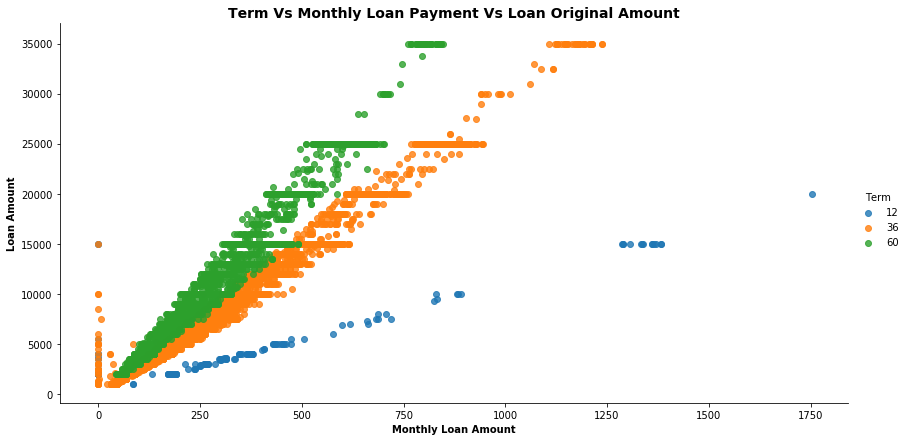

In [18]:
g = sns.FacetGrid(data =df_samp,hue = 'Term',size =6, aspect = 2)
g = g.map(sns.regplot,'MonthlyLoanPayment','LoanOriginalAmount',x_jitter= 0.09,fit_reg = False);
g.add_legend()

plt.xlabel('Monthly loan Amount'.title(),fontsize = 10,weight = "bold")
plt.ylabel('Loan Amount'.title(),fontsize = 10,weight = "bold");
plt.title('Term Vs Monthly Loan payment Vs Loan Original amount'.title(),fontsize = 14,weight = "bold");


> For my varable of intrest which is the loanStatus i discovered the ranges of values for the following that could hep predict a loan that will be completed as at when due
- 1, Borrowers loan Amount must be < 10,000usd 
- 2, Borrowers Monthly Loan Amount  must be < 400usd per month
- 3, Lenders Yield should be between 0.10 and 0.30
- 4, Prosperating C or D is Prefered
- 5, Loan Term should be 36 month  option

In [19]:
!jupyter nbconvert Slide_Deck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Slide_Deck.ipynb to slides
[NbConvertApp] Writing 956367 bytes to Slide_Deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\ProgramData\A